In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:

df = pd.read_excel('data/Colombianos_registrados_en_el_exterior_20251113 (1).xlsx', engine='openpyxl')

## LIMPIEZA DE DATOS

In [ ]:
# Diccionarios de reemplazo
remplasos_area = {
    'ECONOM�A': 'ECONOMIA',
    'ADMINISTRACI�N': 'ADMINISTRACION',
    'INGENIER�A': 'INGENIERIA',
    'AGRONOM�A': 'AGRONOMIA',
    'CIENCIAS DE LA EDUCACI�N': 'CIENCIAS DE LA EDUCACION',
    'CIENCIAS SOCIALES, PERIODISMO E INFORMACI�N': 'CIENCIAS SOCIALES, PERIODISMO E INFORMACION',
    'MATEM�TICAS': 'MATEMATICAS',
    'TECNOLOG�AS': 'TECNOLOGIAS',
    'PROGRAMAS Y CERTIFICACIONES GEN�RICAS': 'PROGRAMAS Y CERTIFICACIONES GENERICAS',
    'ESTAD�STICA': 'ESTADISTICA',
    'AVIACI�N': 'AVIACION',
    'EDUCACI�N': 'EDUCACION',
    'DISE�O': 'DISENO',
    'F�SICA': 'FISICA',
    'M�SICA': 'MUSICA',
    'NUTRICI�N': 'NUTRICION',
    'ANTROPOLOG�A': 'ANTROPOLOGIA',
    'LING��STICA': 'LINGUISTICA',
    'QU�MICA': 'QUIMICA',
    'ODONTOLOG�A': 'ODONTOLOGIA',
    'GEOLOG�A': 'GEOLOGIA',
    'FILOSOF�A': 'FILOSOFIA',
    'INSTRUMENTACI�N': 'INSTRUMENTACION',
    'SALUD P�BLICA': 'SALUD PUBLICA',
    'OPTOMETR�A': 'OPTOMETRIA',
    'TECNOLOGIAS DE LA INFORMACI�N Y LA COMUNICACI�N (TIC)':
    'TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACION (TIC)',
    'INGENIERIA, INDUSTRIA Y CONSTRUCCI�N': 'INGENIERIA, INDUSTRIA Y CONSTRUCCION'    
}

# Diccionario con todos los reemplazos para 'Sub Area Conocimiento'
remplazos_subarea = {
    'PERIODISMO, COMUNICACI�N SOCIAL Y AFINES': 'PERIODISMO, COMUNICACION SOCIAL Y AFINES',
    'ADMINISTRACI�N': 'ADMINISTRACION',
    'INGENIER�A INDUSTRIAL Y AFINES': 'INGENIERIA INDUSTRIAL Y AFINES',
    'SOCIOLOG�A, TRABAJO SOCIAL Y AFINES': 'SOCIOLOGIA, TRABAJO SOCIAL Y AFINES',
    'CONTADUR�A P�BLICA': 'CONTADURIA PUBLICA',
    'ENFERMER�A': 'ENFERMERIA',
    'INGENIER�A CIVIL Y AFINES': 'INGENIERIA CIVIL Y AFINES',
    'AGRONOM�A': 'AGRONOMIA',
    'INGENIER�A MEC�NICA Y AFINES': 'INGENIERIA MECANICA Y AFINES',
    'PSICOLOG�A Y AFINES': 'PSICOLOGIA Y AFINES',
    'ECONOM�A': 'ECONOMIA',
    'DISE�O': 'DISENO',
    'INGENIER�A EL�CTRICA Y AFINES': 'INGENIERIA ELECTRICA Y AFINES',
    'INGENIER�A ELECTR�NICA, TELECOMUNICACIONES Y AFINES': 'INGENIERIA ELECTRONICA, TELECOMUNICACIONES Y AFINES',
    'INGENIER�A EN SISTEMAS, TELEM�TICA Y AFINES': 'INGENIERIA EN SISTEMAS, TELEMATICA Y AFINES',
    'CIENCIA POL�TICA Y/O RELACIONES INTERNACIONALES': 'CIENCIA POLITICA Y/O RELACIONES INTERNACIONALES',
    'EDUCACI�N': 'EDUCACION',
    'FILOSOF�A, TEOLOG�A Y AFINES': 'FILOSOFIA, TEOLOGIA Y AFINES',
    'GEOLOG�A': 'GEOLOGIA',
    'ODONTOLOG�A': 'ODONTOLOGIA',
    'INGENIER�A QU�MICA Y AFINES': 'INGENIERIA QUIMICA Y AFINES',
    'ARTES DRAM�TICAS Y REPRESENTATIVAS': 'ARTES DRAMATICAS Y REPRESENTATIVAS',
    'BACTERIOLOG�A': 'BACTERIOLOGIA',
    'SALUD P�BLICA': 'SALUD PUBLICA',
    'MATEM�TICAS, ESTAD�STICA Y AFINES': 'MATEMATICAS, ESTADISTICA Y AFINES',
    'ARTES PL�STICAS, VISUALES Y AFINES': 'ARTES PLASTICAS, VISUALES Y AFINES',
    'INSTRUMENTACI�N QUIR�RGICA': 'INSTRUMENTACION QUIRURGICA',
    'BIOLOG�A, MICROBIOLOG�A Y AFINES': 'BIOLOGIA, MICROBIOLOGIA Y AFINES',
    'INGENIER�A DE MINAS, METALURGIA Y AFINES': 'INGENIERIA DE MINAS, METALURGIA Y AFINES',
    'INGENIER�A ADMINISTRATIVA Y AFINES': 'INGENIERIA ADMINISTRATIVA Y AFINES',
    'INGENIER�A AGR�COLA, FORESTAL Y AFINES': 'INGENIERIA AGRICOLA, FORESTAL Y AFINES',
    'DEPORTES, EDUCACI�N F�SICA Y RECREACI�N': 'DEPORTES, EDUCACION FISICA Y RECREACION',
    'INGENIER�A AMBIENTAL, SANITARIA Y AFINES': 'INGENIERIA AMBIENTAL, SANITARIA Y AFINES',
    'NUTRICI�N Y DIET�TICA': 'NUTRICION Y DIETETICA',
    'ANTROPOLOG�A O ARTES LIBERALES': 'ANTROPOLOGIA O ARTES LIBERALES',
    'LENGUAS MODERNAS, FILOLOG�A, LING��STICA Y AFINES': 'LENGUAS MODERNAS, FILOLOGIA, LINGUISTICA Y AFINES',
    'INGENIER�A AGROINDUSTRIAL, ALIMENTOS Y AFINES': 'INGENIERIA AGROINDUSTRIAL, ALIMENTOS Y AFINES',
    'M�SICA': 'MUSICA',
    'INGENIER�A BIOM�DICA Y AFINES': 'INGENIERIA BIOMEDICA Y AFINES',
    'QU�MICA Y AFINES': 'QUIMICA Y AFINES',
    'INGENIER�A DE PETR�LEOS': 'INGENIERIA DE PETROLEOS',
    'F�SICA': 'FISICA',
    'OPTOMETR�A': 'OPTOMETRIA',
    'INGENIER�A AGRON�MICA, PECUARIA Y AFINES': 'INGENIERIA AGRONOMICA, PECUARIA Y AFINES',
    'OTRAS INGENIER�AS': 'OTRAS INGENIERIAS',
    'FORMACI�N MILITAR': 'FORMACION MILITAR',
    'BIBLIOTECOLOG�A': 'BIBLIOTECOLOGIA',
    'TECNOLOG�AS DE LA INFORMACI�N Y LA COMUNICACI�N (TIC)': 'TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACION (TIC)',
    'GEOGRAF�A O HISTORIA': 'GEOGRAFIA O HISTORIA',
    'EDUCACION FISICA Y RECREACI�N': 'EDUCACION FISICA Y RECREACION',
    'AVIACI�N': 'AVIACION'
}

remplasos_nivel = {
    'NO INDICA': 'NO INDICA',
    'PREGRADO - PROFESIONAL': 'PREGRADO PROFESIONAL',
    'PREGRADO PROFESIONAL': 'PREGRADO PROFESIONAL',
    'BACHILLERATO': 'BACHILLERATO',
    'POSTGRADO - ESPECIALIZACION': 'POSTGRADO ESPECIALIZACION',
    'POSTGRADO - ESPECIALIZACI�N': 'POSTGRADO ESPECIALIZACION',
    'PRIMARIA': 'PRIMARIA',
    'POSTGRADO - MAESTRIA': 'POSTGRADO MAESTRIA',
    'PREGRADO - TECNICO PROFESIONAL': 'PREGRADO TECNICO PROFESIONAL',
    'PREGRADO - T�CNICO PROFESIONAL': 'PREGRADO TECNICO PROFESIONAL',
    'POSTGRADO - DOCTORADO': 'POSTGRADO DOCTORADO',
    'NINGUNO': 'NINGUNO',
    'PREGRADO - TECNOLOGICO': 'PREGRADO TECNOLOGICO',
    'PREGRADO - TECNOL�GICO': 'PREGRADO TECNOLOGICO',
    '(NO REGISTRA)': 'NO REGISTRA',
    'NO REGISTRA': 'NO REGISTRA',
    'SIN PROFESION': 'SIN PROFESION',
    'SIN PROFESI�N': 'SIN PROFESION',
    'UNIVERSITARIO': 'PREGRADO PROFESIONAL',
    'TECNICA PROFESIONAL': 'PREGRADO TECNICO PROFESIONAL',
    'T�CNICA PROFESIONAL': 'PREGRADO TECNICO PROFESIONAL',
    'ESPECIALIZACION': 'POSTGRADO ESPECIALIZACION',
    'ESPECIALIZACI�N': 'POSTGRADO ESPECIALIZACION',
    'MAESTRIA': 'POSTGRADO MAESTRIA',
    'DOCTORADO': 'POSTGRADO DOCTORADO',
    'TECNOLÓGICA': 'PREGRADO TECNOLOGICO',
    'TECNOL�GICA': 'PREGRADO TECNOLOGICO',
    'POSTGRADO POSTGRADO POSTGRADO POSTGRADO ESPECIALIZACION': 'POSTGRADO ESPECIALIZACION',
    'POSTGRADO POSTGRADO POSTGRADO POSTGRADO POSTGRADO MAESTRIA': 'POSTGRADO MAESTRIA',
    'POSTGRADO POSTGRADO POSTGRADO POSTGRADO POSTGRADO DOCTORADO': 'POSTGRADO DOCTORADO',
    'POSTGRADO POSTGRADO POSTGRADO POSTGRADO MAESTRIA': 'POSTGRADO MAESTRIA',
    'POSTGRADO POSTGRADO POSTGRADO POSTGRADO DOCTORADO': 'POSTGRADO DOCTORADO',
    '(NO REGISTRA)':'NINGUNO',
    'SIN PROFESION':'NINGUNO',
    'NO INDICA':'NINGUNO',
    '(NINGUNO)':'NINGUNO'
}

df['Nivel Académico'] = df['Nivel Académico'].replace(remplasos_nivel, regex=True)
df['Área Conocimiento'] = df['Área Conocimiento'].replace(remplasos_area, regex=True)
df['Sub Area Conocimiento'] = df['Sub Area Conocimiento'].replace(remplazos_subarea, regex=True)
df['Nivel Académico'] = df['Nivel Académico'].replace({'POSTGRADO POSTGRADO DOCTORADO': 'POSTGRADO DOCTORADO',
 'POSTGRADO POSTGRADO MAESTRIA': 'POSTGRADO MAESTRIA'}, regex=True)


In [ ]:
print(df['Área Conocimiento'].unique())
print(df['Sub Area Conocimiento'].unique())
print(df['Nivel Académico'].unique())

df.loc[df['Nivel Académico'] == '(NINGUNO)', 'Nivel Académico'] = 'NINGUNO'
df.loc[df['Área Conocimiento'] == 'TECNOLOGIAS DE LA INFORMACI�N Y LA COMUNICACI�N (TIC)', 'Área Conocimiento'] = 'TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACION (TIC)'
df.loc[df['Sub Area Conocimiento'] == 'TECNOLOG�AS DE LA INFORMACI�N Y LA COMUNICACI�N (TIC)', 'Sub Area Conocimiento'] = 'TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACION (TIC)'

['NINGUNA' 'CIENCIAS SOCIALES Y HUMANAS'
 'ECONOMIA, ADMINISTRACION CONTADURIA Y AFINES'
 'INGENIERIA, ARQUITECTURA Y AFINES' 'NO INDICA' 'CIENCIAS DE LA SALUD'
 'AGRONOMIA, VETERINARIA Y AFINES' 'SERVICIOS' 'BELLAS ARTES'
 'AGRONOMIA, VETERINARIA Y ZOOTECNIA' 'CIENCIAS DE LA EDUCACION'
 'CIENCIAS SOCIALES, PERIODISMO E INFORMACION'
 'MATEMATICAS Y CIENCIAS NATURALES' 'SALUD Y BIENESTAR' 'AVIACION'
 'ADMINISTRACION DE EMPRESAS Y DERECHO' 'EDUCACION' 'COCINA Y CULINARIA'
 'INGENIERIA, INDUSTRIA Y CONSTRUCCI�N' '(NO REGISTRA)'
 'ARTES Y HUMANIDADES' 'CIENCIAS NATURALES, MATEMATICAS Y ESTADISTICA'
 'TECNOLOGIAS DE LA INFORMACI�N Y LA COMUNICACI�N (TIC)'
 'PROGRAMAS Y CERTIFICACIONES GENERICAS'
 'AGROPECUARIO, SILVICULTURA, PESCA, Y VETERINARIA']
['NINGUNA' 'PERIODISMO, COMUNICACION SOCIAL Y AFINES' 'ADMINISTRACION'
 'INGENIERIA INDUSTRIAL Y AFINES' 'SOCIOLOGIA, TRABAJO SOCIAL Y AFINES'
 'NO INDICA' 'OTROS ESTUDIOS EN CIENCIAS SOCIALES Y HUMANAS' 'MEDICINA'
 'ARQUITECTURA' 'CONTADURIA PUBL

In [ ]:
#OBTENCIÓN DE DATOS SOLO DE COLOMBIA

#dividimos la columna de ciudad de nacimiento en tres columnas con informacion del pais, departamento y ciudad
df[['pais de origen', 'departamento de origen', 'Ciudad de Nacimiento']] = df['Ciudad de Nacimiento'].str.split('/', expand=True)


# filtramos los datos de personas solo nacidas en Colombia
df = df[df['pais de origen'] == 'COLOMBIA']

In [ ]:
df[['Ciudad de residencia', 'Estado de residencia']] = df['Ciudad de Residencia'].str.split('/', expand=True)
df[['Año de Registro', 'Hora de Registro']] = df['Fecha de Registro'].str.split('-', expand=True)

In [ ]:
condicion1 = df['Área Conocimiento'].isin(['NINGUNA', 'NO INDICA', '(NO REGISTRA)'])
condicion2= df['Sub Area Conocimiento'].isin(['NINGUNA', 'NO INDICA', '(NO REGISTRA)'])
df.loc[condicion1, 'Área Conocimiento'] = 'NINGUNA'
df.loc[condicion2, 'Sub Area Conocimiento'] = 'NINGUNA'

cond = (
    (df['Área Conocimiento'] != 'NINGUNA') &
    (df['Nivel Académico'].isin(['NO INDICA', 'NINGUNO']))
)

df = df[~cond]

df = df[df['Año de Registro'] != '1900']


In [ ]:
df['Etnia de la persona'] = df['Etnia de la persona'].replace('IND�GENA', 'INDIGENA')

In [ ]:
Df_final = df.drop(columns=['Código ISO país', 'Oficina de registro', 'Hora de Registro','Cantidad de personas',
                             'Estado civil', 'Edad (años)', 'Estatura (CM)', 'Localización','Fecha de Registro', 'Ciudad de Residencia'])

## INFORMACION GENERAL DEL DF

In [ ]:
Df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461332 entries, 1 to 624099
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   País                    461332 non-null  object
 1   Grupo edad              461332 non-null  object
 2   Área Conocimiento       461332 non-null  object
 3   Sub Area Conocimiento   461332 non-null  object
 4   Nivel Académico         461332 non-null  object
 5   Género                  461332 non-null  object
 6   Etnia de la persona     461332 non-null  object
 7   Ciudad de Nacimiento    461332 non-null  object
 8   pais de origen          461332 non-null  object
 9   departamento de origen  461332 non-null  object
 10  Ciudad de residencia    461332 non-null  object
 11  Estado de residencia    461332 non-null  object
 12  Año de Registro         461332 non-null  object
dtypes: object(13)
memory usage: 49.3+ MB


In [ ]:

print(f'Número de filas: {Df_final.shape[0]}\nNúmero de columnas: {Df_final.shape[1]}')

Número de filas: 461332
Número de columnas: 13


In [ ]:
Df_final.describe(include='object')

,País,Grupo edad,Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Género,Etnia de la persona,Ciudad de Nacimiento,pais de origen,departamento de origen,Ciudad de residencia,Estado de residencia,Año de Registro
count,461332,461332,461332,461332,461332,461332,461332,461332,461332,461332,461332,461332,461332
unique,4,7,23,65,10,4,8,1675,1,34,87,8443,13
top,ESTADOS UNIDOS,ADULTO,NINGUNA,NINGUNA,BACHILLERATO,FEMENINO,OTRO,BOGOTA,COLOMBIA,CUNDINAMARCA,FLORIDA,MIAMI,2023
freq,407991,269751,327593,324868,140793,250628,273586,91558,461332,132208,95537,17917,79120


In [ ]:
vbles_numericas = Df_final.select_dtypes(include='number').columns

vbles_numericas

Index([], dtype='object')

## ANALISIS Y VISUALIZACIÓN

Los datos analizados corresponden a personas nacidas en Colombia

/tmp/ipykernel_2528/258916820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=areas.values / 1000,


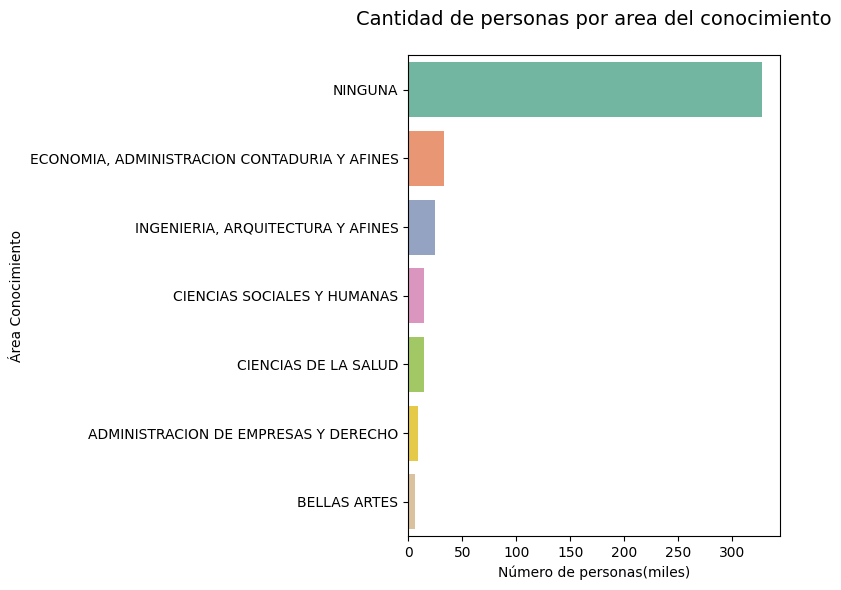

In [ ]:
areas = Df_final['Área Conocimiento'].value_counts().sort_values(ascending=False).head(7)

plt.figure(figsize=(8,6))
sns.barplot(x=areas.values / 1000,
            y=areas.index,
            palette='Set2')
plt.title('Cantidad de personas por area del conocimiento\n', fontsize=14)
plt.xlabel('Número de personas(miles)')

plt.tight_layout()
plt.show()

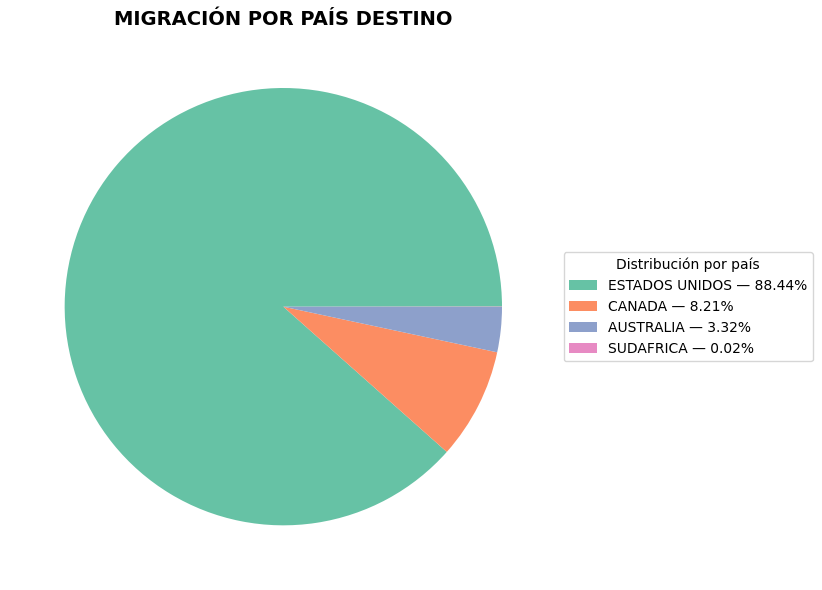

In [ ]:

# Conteo de países
Pais = Df_final['País'].value_counts().sort_values(ascending=False)

labels = Pais.index
sizes = Pais.values

# Porcentajes para la leyenda
porcentajes = (sizes / sizes.sum() * 100).round(2)

# Paleta de colores
colors = sns.color_palette("Set2", len(labels))

plt.figure(figsize=(8,6))

# Pie chart limpio (sin texto dentro)
wedges, _ = plt.pie(
    sizes,
    colors=colors,
    labels=None,

)

# LEYENDA con País + %
legend_labels = [f"{labels[i]} — {porcentajes[i]}%" for i in range(len(labels))]
plt.legend(
    wedges,
    legend_labels,
    title="Distribución por país",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("MIGRACIÓN POR PAÍS DESTINO", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [ ]:
df_gen = Df_final[Df_final['Género'].isin(['FEMENINO', 'MASCULINO'])]

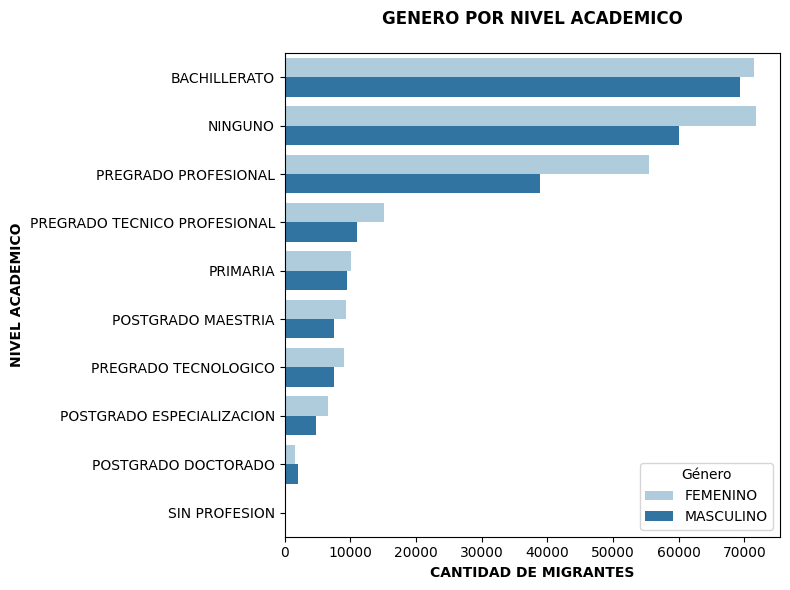

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_gen,
              hue='Género',
              y='Nivel Académico',
              palette= 'Paired',
              order = df_gen['Nivel Académico'].value_counts().index)
plt.title('GENERO POR NIVEL ACADEMICO\n', fontweight='bold')
plt.ylabel('NIVEL ACADEMICO', fontweight='bold')
plt.xlabel('CANTIDAD DE MIGRANTES', fontweight='bold')
plt.tight_layout()

/tmp/ipykernel_2528/2132578284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=departamento.values / 1000,


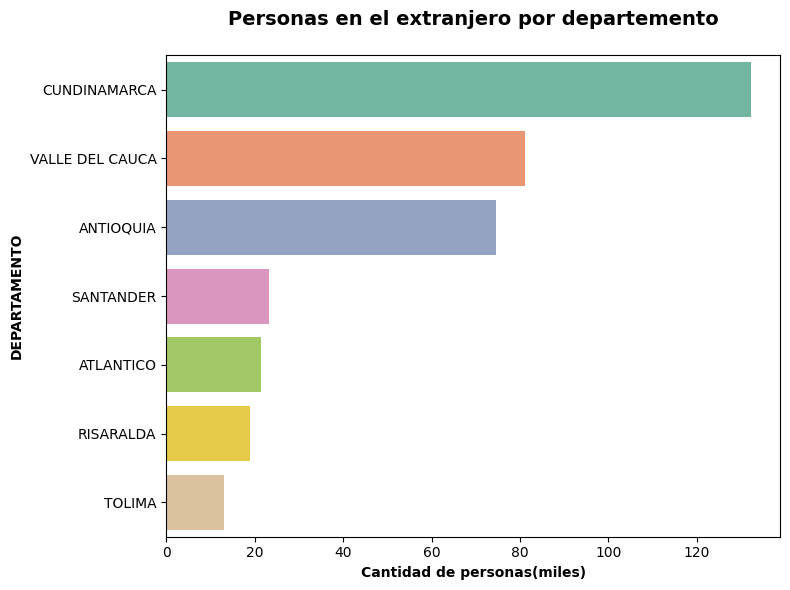

In [ ]:
departamento = Df_final['departamento de origen'].value_counts().sort_values(ascending=False).head(7)

plt.figure(figsize=(8,6))
sns.barplot(x=departamento.values / 1000,
            y=departamento.index,
            palette='Set2')
plt.title('Personas en el extranjero por departemento\n', fontsize=14, fontdict={'fontweight':'bold'})
plt.xlabel('Cantidad de personas(miles)', fontweight='bold')
plt.ylabel('DEPARTAMENTO', fontweight='bold')

plt.tight_layout()
plt.show()

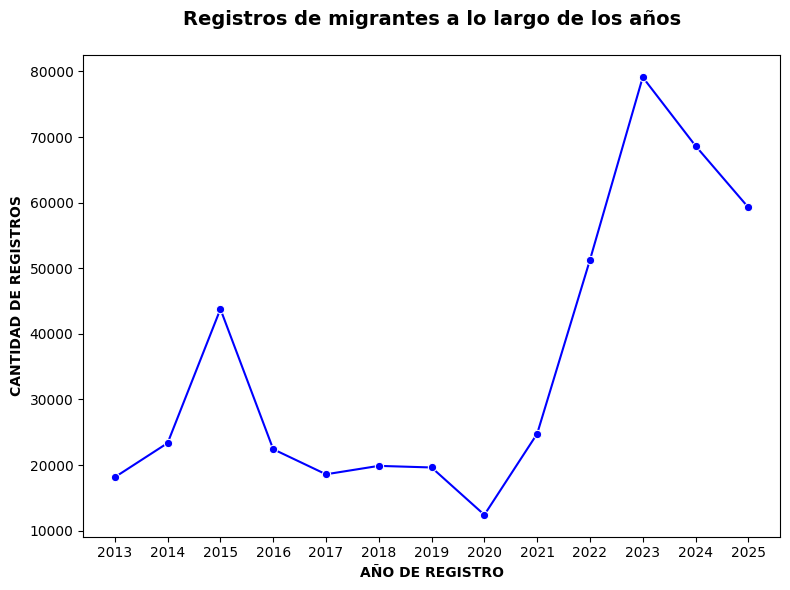

In [ ]:
reguistros = Df_final['Año de Registro'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.lineplot(x=reguistros.index,
             y=reguistros.values,
             marker='o',
             color='b')
plt.title('Registros de migrantes a lo largo de los años\n', fontsize=14, fontweight='bold')
plt.xlabel('AÑO DE REGISTRO', fontweight='bold')
plt.ylabel('CANTIDAD DE REGISTROS', fontweight='bold')
plt.tight_layout()
plt.show()  